In [3]:
import numpy as np
import matplotlib.pyplot as plt
def draw_loss(filepath):
    import matplotlib.pyplot as plt
    loss_list = list(np.load(filepath))
    plt.plot(list(range(1, len(loss_list) + 1)), loss_list)

## 试验-教师网络训练
损失函数：交叉熵

优化器：SGD(lr = 0.001)
lr_schduler = step()

epoch：200

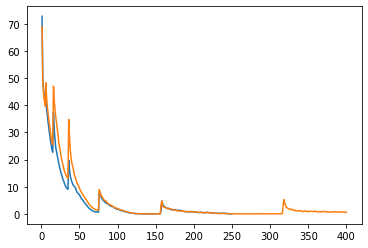

In [4]:
draw_loss('cache/experimental_data/teacher_loss_250.npy')
draw_loss('cache/experimental_data/teacher_loss_400.npy')

## 实验-1
损失函数：$loss = loss_{one-hot}  + loss_{information-entropy} * 5 + loss_{active} * 0.1 + loss_{kd}$

生成器优化器：Adam(lr = 0.2)

lr_scheduler：CosineAnnealingWarm(T_0 = 5, T_mult = 2)

学生网络优化器：Adam(lr = 2e-3)

lr_scheduler：CosineAnnealingWarm(T_0 = 5, T_mult = 2

epoch = 100

oh = 1, ie = 5, a = 0.1

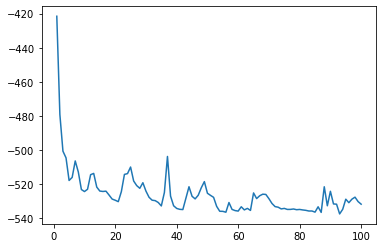

In [2]:
draw_loss('cache/models//student_epoch_100.npy')

# 试验-2
加了个硬损失loss_kd_h = self.criterion(self.student(gen_img.detach()), pseudo_labels)

loss = loss_onehot * self.oh + loss_information_entropy * self.ie + loss_active * self.a + loss_kd + loss_kd_h

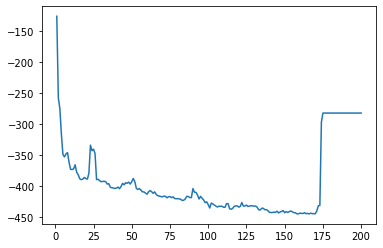

In [9]:
draw_loss('cache/models/student/student_epoch_200.npy')

# test network

In [2]:
import os
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from torchvision.datasets.mnist import MNIST
from torchvision.datasets import CIFAR10, CIFAR100, ImageFolder
from torchvision.datasets.imagenet import ImageNet
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import numpy as np



In [6]:
def test(net, dataset_test, dataset_test_loader):
    net.eval()
    total_correct = 0
    with torch.no_grad():
        for i, (images, labels) in enumerate(dataset_test_loader, start=1):
            images, labels = Variable(images).cuda(), Variable(labels).cuda()
            output = net(images)
            pred = output.data.max(1)[1]
            total_correct += pred.eq(labels.data.view_as(pred)).sum()
        
    acc = float(total_correct) / len(dataset_test)
    print('Test Accuracy:%f' % (acc))
transform_test = transforms.Compose([
				transforms.ToTensor(),
				transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
			])
dataset_test = CIFAR10('/home/ubuntu/datasets/', train=False, transform=transform_test)
dataset_test_loader = DataLoader(dataset_test, batch_size=512, num_workers=0)
model
net = torch.load('/home/ubuntu/models/teacher')
test(net, dataset_test, dataset_test_loader)


ModuleNotFoundError: No module named 'resnet'